##OpenSearch OSDD Analysis

In [3]:
%matplotlib inline
import pandas as pd
import json as js  # name conflict with sqla
import sqlalchemy as sqla
from sqlalchemy.orm import sessionmaker

pd.set_option("display.max_rows",250)

In [4]:
# grab the clean text from the rds
with open('../local/big_rds.conf', 'r') as f:
    conf = js.loads(f.read())

# our connection
engine = sqla.create_engine(conf.get('connection'))

So what do we see in the 4906 responses?

In [7]:
sql = """select kvps.value, count(kvps.value)
from osdds,
    json_each_text(namespaces) as kvps
group by kvps.value
order by count desc, kvps.value
;"""

In [ ]:
# df = pd.read_sql(sql, engine, index_col='id', parse_dates=['metadata_age'])

In [8]:
df = pd.read_sql(sql, engine)

In [9]:
df
# number of references to a namespace

,value,count
0,http://a9.com/-/spec/opensearch/1.1/,4614
1,http://www.w3.org/XML/1998/namespace,4608
2,http://www.mozilla.org/2006/browser/search/,1053
3,http://a9.com/-/opensearch/extensions/geo/1.0/,69
4,http://a9.com/-/opensearch/extensions/time/1.0/,32
5,http://www.w3.org/2001/XMLSchema,19
6,http://www.w3.org/2001/XMLSchema-instance,19
7,http:/www.mozilla.org/2006/browser/search/,10
8,http://modwebsrv.modaps.eosdis.nasa.gov/opense...,9
9,http://a9.com/-/opensearch/extensions/referrer/,8


In [14]:
# which ones contain both time and geo?

sql = """
select url, 
    case when namespaces::jsonb ? 'geo' then True else False end as contains_geo,
    case when namespaces::jsonb ? 'time' then True else False end as contains_time
from osdds
where namespaces::jsonb ?| array['time', 'geo'];
"""
df = pd.read_sql(sql, engine)

In [15]:
from IPython.display import display
with pd.option_context('display.max_colwidth', 1000):
    display(df)

,url,contains_geo,contains_time
0,http://www.hospitalsdatabase.lshtm.ac.uk/opensearch/description.php,True,False
1,http://nsidc.org/api/opensearch/1.1/dataset/NSIDC-0218/granule/description,True,True
2,http://lance-modis.eosdis.nasa.gov/user_services/dataset_opensearch.xml,True,True
3,http://mapdata.environment.nsw.gov.au/geonetwork/srv/en/portal.opensearch,True,False
4,http://podaac.jpl.nasa.gov/ws/search/granule/osd.xml,True,True
5,http://www.coris.noaa.gov/geoportal/openSearchDescription,True,False
6,http://ladsweb.nascom.nasa.gov/data/dataset_opensearch.xml,True,True
7,http://schemas.opengis.net/opensearchgeo/1.0/examples/osd/osddgeotime01.xml,True,True
8,http://metadata.gis.washington.edu/geoportal/openSearchDescription,True,False
9,http://vnavigator.eumetsat.int/discovery/os-description.xml,True,False


Only 32 of those contain both the time and geo namespaces (this is awkward, going by prefixes in the postgres json).

The SQL for that count:

```
with a as (
	select url, 
		case when namespaces::jsonb ? 'geo' then True else False end as contains_geo,
		case when namespaces::jsonb ? 'time' then True else False end as contains_time
	from osdds
	where namespaces::jsonb ?| array['time', 'geo']
)

select count(*)
from a 
where contains_geo = True and contains_time = True;
```

And, it looks like most of those are related to an ESIP participant (ie someone who knows Doug). But there are dataset-level searches in the above set so let's count by host.

In [16]:
sql = """
with a as (
    select url, response_id, 
        case when namespaces::jsonb ? 'geo' then True else False end as contains_geo,
        case when namespaces::jsonb ? 'time' then True else False end as contains_time
    from osdds
    where namespaces::jsonb ?| array['time', 'geo']
)

select r.host, count(*)
from a join responses r on r.id = a.response_id
where contains_geo = True and contains_time = True
group by r.host;
"""
df = pd.read_sql(sql, engine)

In [17]:
df

,host,count
0,eo-virtual-archive4.esa.int,1
1,nsidc.org,8
2,lance3.modaps.eosdis.nasa.gov,1
3,gcmd.gsfc.nasa.gov,2
4,idn.ceos.org,1
5,modwebsrv.modaps.eosdis.nasa.gov,8
6,ladsweb.nascom.nasa.gov,3
7,lance-modis.eosdis.nasa.gov,1
8,gcmd.nasa.gov,3
9,easin.jrc.ec.europa.eu,1


So large federal data centers and a schema. The parameter and facet extensions are not well-represented either.

Linkrot on the harvested URLS

In [18]:
sql = """
select o.status_code, count(o.id), 
    -- add the duration between checked and harvested
    avg(extract(day from o.date_verified - r.initial_harvest_date))::int as avg_lifespan_in_days,
    min(extract(day from o.date_verified - r.initial_harvest_date))::int as min_lifespan_in_days,
    max(extract(day from o.date_verified - r.initial_harvest_date))::int as max_lifespan_in_days
from osdds o join responses r on r.id = o.response_id
group by o.status_code
order by o.status_code ASC;
"""
df = pd.read_sql(sql, engine)

In [19]:
df

# this makes no sense as a table. lifespan is harvest to linkrot check
# NaN as status_code is related to requests exceptions, no code.

,status_code,count,avg_lifespan_in_days,min_lifespan_in_days,max_lifespan_in_days
0,200,3790,139,27,460
1,301,109,283,36,460
2,302,71,216,36,460
3,303,21,305,41,357
4,400,4,95,76,106
5,401,1,35,35,35
6,403,38,282,69,448
7,404,83,245,42,460
8,405,2,356,355,356
9,406,2,222,222,222


In [20]:
df.sort('avg_lifespan_in_days')

# meh, still not a good look

,status_code,count,avg_lifespan_in_days,min_lifespan_in_days,max_lifespan_in_days
5,401,1,35,35,35
13,521,2,60,43,77
11,502,2,66,43,90
14,522,7,67,43,77
4,400,4,95,76,106
0,200,3790,139,27,460
10,500,258,141,42,356
12,503,4,161,75,358
16,NaN,213,167,28,460
2,302,71,216,36,460


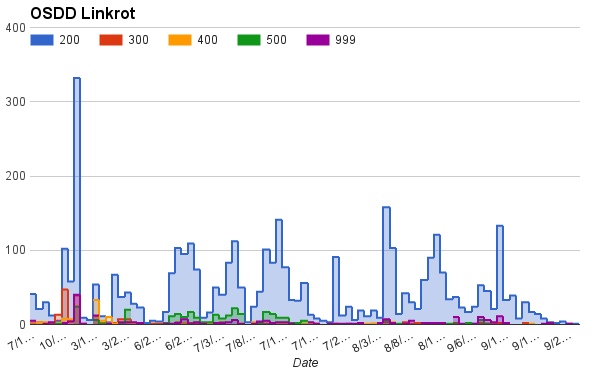

In [1]:
from IPython.display import Image
Image(filename='screenshots/osdd_linkrot_area.png') 

# this is not a good chart

| Date       | 200 | 300 | 400 | 500 | 999 | 
|------------|-----|-----|-----|-----|-----| 
| 7/17/2014  | 41  | 2   | 2   |     | 5   | 
| 7/29/2014  | 21  | 3   | 3   |     |     | 
| 7/30/2014  | 30  | 2   | 3   |     | 1   | 
| 7/31/2014  | 12  | 2   |     |     | 3   | 
| 10/27/2014 | 5   | 13  | 1   | 1   |     | 
| 10/28/2014 | 102 | 47  | 8   | 1   | 2   | 
| 10/29/2014 | 58  | 5   | 7   |     | 4   | 
| 10/30/2014 | 332 | 39  | 25  | 24  | 40  | 
| 3/4/2015   | 9   | 1   |     |     | 1   | 
| 3/6/2015   | 6   |     |     |     |     | 
| 3/12/2015  | 54  | 11  | 33  | 6   | 12  | 
| 3/13/2015  | 11  | 2   | 5   | 1   |     | 
| 3/15/2015  | 3   |     | 10  |     | 1   | 
| 3/18/2015  | 67  | 2   | 1   |     |     | 
| 3/19/2015  | 37  | 7   | 2   | 1   | 3   | 
| 3/20/2015  | 43  | 7   | 3   | 20  | 3   | 
| 6/16/2015  | 28  | 1   | 1   |     | 3   | 
| 6/18/2015  | 23  |     |     | 1   | 2   | 
| 6/19/2015  | 2   |     |     |     |     | 
| 6/20/2015  | 5   | 1   |     |     |     | 
| 6/22/2015  | 4   | 1   |     |     |     | 
| 6/23/2015  | 17  | 1   | 1   | 2   | 1   | 
| 6/24/2015  | 69  |     |     | 11  | 1   | 
| 6/25/2015  | 103 | 3   |     | 14  | 2   | 
| 6/26/2015  | 95  | 1   | 2   | 10  | 7   | 
| 6/27/2015  | 109 | 2   |     | 17  | 1   | 
| 6/28/2015  | 74  | 2   |     | 9   | 3   | 
| 6/29/2015  | 9   |     |     | 3   | 1   | 
| 7/1/2015   | 16  | 1   | 1   | 3   |     | 
| 7/2/2015   | 50  |     |     | 13  | 2   | 
| 7/3/2015   | 40  | 3   | 1   | 8   | 2   | 
| 7/4/2015   | 83  |     |     | 12  | 3   | 
| 7/5/2015   | 112 |     |     | 22  | 6   | 
| 7/6/2015   | 50  |     | 1   | 14  | 1   | 
| 7/7/2015   | 3   |     |     |     |     | 
| 7/8/2015   | 24  | 1   | 3   |     | 1   | 
| 7/9/2015   | 44  | 3   | 1   | 2   | 4   | 
| 7/10/2015  | 101 | 1   |     | 17  | 5   | 
| 7/11/2015  | 83  | 2   |     | 14  | 2   | 
| 7/12/2015  | 141 | 1   | 2   | 9   | 3   | 
| 7/13/2015  | 77  | 2   | 2   | 9   | 3   | 
| 7/14/2015  | 33  | 1   |     | 2   | 1   | 
| 7/15/2015  | 32  |     |     | 2   |     | 
| 7/16/2015  | 56  |     | 1   | 5   |     | 
| 7/17/2015  | 13  | 1   | 1   |     | 3   | 
| 7/18/2015  | 8   | 1   |     |     | 1   | 
| 7/19/2015  | 5   |     |     |     |     | 
| 7/21/2015  | 3   |     |     | 1   | 1   | 
| 7/22/2015  | 91  | 1   |     |     | 1   | 
| 7/28/2015  | 12  |     |     |     | 1   | 
| 7/29/2015  | 24  | 1   |     |     | 1   | 
| 7/30/2015  | 6   |     |     |     | 1   | 
| 7/31/2015  | 19  | 1   | 1   |     | 2   | 
| 8/1/2015   | 11  |     | 1   |     |     | 
| 8/2/2015   | 19  | 1   | 1   |     |     | 
| 8/3/2015   | 9   |     |     |     | 2   | 
| 8/4/2015   | 158 | 3   |     | 5   | 7   | 
| 8/5/2015   | 103 |     | 3   | 1   | 2   | 
| 8/6/2015   | 14  |     |     | 1   |     | 
| 8/7/2015   | 42  | 3   |     |     | 1   | 
| 8/8/2015   | 30  | 1   |     |     | 5   | 
| 8/9/2015   | 21  | 2   |     |     |     | 
| 8/10/2015  | 60  |     |     |     | 2   | 
| 8/11/2015  | 90  | 1   |     |     | 2   | 
| 8/12/2015  | 121 | 1   | 1   |     | 2   | 
| 8/13/2015  | 70  | 1   | 1   | 1   | 2   | 
| 8/14/2015  | 34  |     |     | 1   |     | 
| 9/2/2015   | 37  | 2   |     | 1   | 10  | 
| 9/3/2015   | 23  |     |     |     | 1   | 
| 9/4/2015   | 17  |     |     | 2   |     | 
| 9/6/2015   | 24  |     |     | 1   | 1   | 
| 9/7/2015   | 53  | 2   |     | 6   | 10  | 
| 9/8/2015   | 45  | 1   | 1   | 1   | 6   | 
| 9/9/2015   | 21  | 2   |     |     | 3   | 
| 9/10/2015  | 133 | 2   |     |     | 11  | 
| 9/11/2015  | 33  | 2   |     |     | 2   | 
| 9/12/2015  | 39  |     |     |     |     | 
| 9/13/2015  | 8   |     |     |     |     | 
| 9/14/2015  | 30  | 2   |     |     |     | 
| 9/15/2015  | 17  |     | 1   |     |     | 
| 9/16/2015  | 14  |     |     |     |     | 
| 9/17/2015  | 8   |     |     |     | 1   | 
| 9/18/2015  | 3   |     |     |     | 2   | 
| 9/19/2015  | 2   |     |     |     |     | 
| 9/20/2015  | 4   |     |     |     |     | 
| 9/22/2015  | 1   |     |     |     | 1   | 
| 9/23/2015  | 1   |     |     |     |     | 


and the unpivoted source sql:

```
with a as (
	select o.id, case when o.status_code is null then 999 else o.status_code end as status
	from osdds o
)
select a.status, count(a.status), r.initial_harvest_date::date
from osdds o join responses r on r.id = o.response_id
	join a on a.id = o.id
group by a.status, r.initial_harvest_date::date
order by r.initial_harvest_date::date ASC;
```

In [5]:
sql = """
with a as (
  select o.id, round(case when o.status_code is null then 900 else o.status_code end, -2) as status
  from osdds o
)
select a.status, count(a.status) as num, date_trunc('month', r.initial_harvest_date)::date as months
from osdds o join responses r on r.id = o.response_id
  join a on a.id = o.id
group by a.status, months
order by months ASC;
"""

df = pd.read_sql(sql, engine)
df.pivot(index='months', columns='status', values='num')

status,200.0,300.0,400.0,500.0,900.0
months,,,,,
2014-07-01,104,9,8,NaN,9
2014-10-01,497,104,41,26,46
2015-03-01,230,30,54,28,20
2015-06-01,538,12,4,67,21
2015-07-01,1126,20,14,133,44
2015-08-01,782,13,7,9,25
2015-09-01,513,13,2,11,48


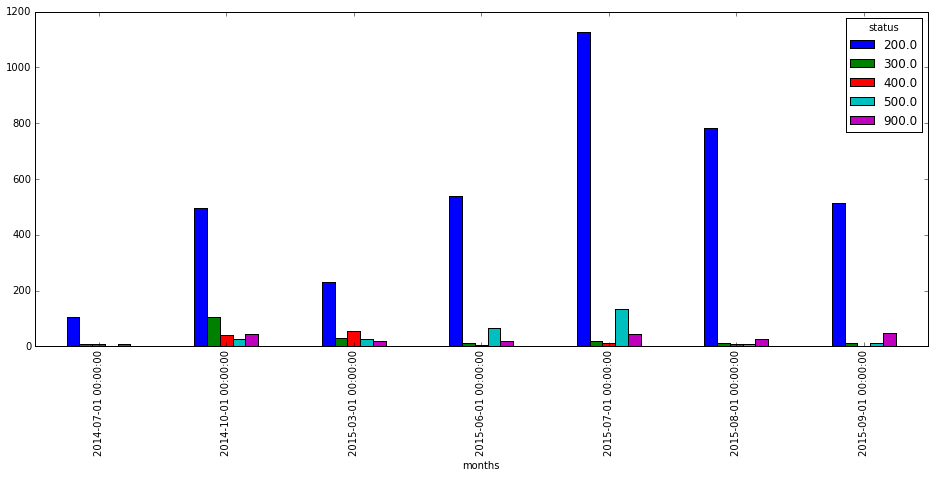

In [8]:
df.pivot(index='months', columns='status', values='num').plot(kind='bar', figsize=(16, 6))

## Onwards to the Templates!

So does it have a template? Are they for ATOM and/or RSS? Can you build a search URL from them and get a successful result?

In [9]:
sql = """
with a as (
    select id, 
        case when url_templates is not null and url_templates::text != '[]'::text then True else False end as has_templates
    from osdds
)
select has_templates, cnt, round(100.0*cnt/(sum(cnt) OVER ()), 2) as pct
from (select has_templates, count(*) as cnt from a group by has_templates) foo;
"""
df = pd.read_sql(sql, engine)
df

,has_templates,cnt,pct
0,False,4025,87.35
1,True,583,12.65


Not so many have templates.

(I generated these urls, see [other notebook] but there can be issues in that.)

How many have

default_urls? 577
search_urls? 559  (95%)
example_urls? 299 (51%)

For search urls, it means I could identify the searchTerms key. For example urls, those are built using the search url with the first item in the "example" element for that format.

It is tracking like the OSDD, at the very least, isn't meant to be public for most of these sites. OpenSearch for the site search under the hood but nothing visible (CMS' are doing this for RSS feeds - it's in the html but not displayed.) So that makes sense for not bothering with templates or examples - they're not meant to *be* publicly available services. 

In [13]:
sql = """
with t 
as (
    select o.id, x.*
    from osdds o, 
        jsonb_to_recordset(o.url_templates::jsonb) 
            as x(
                default_url text,
                search_url text,
                example_url text,
                responses jsonb,
                parameters jsonb,
                param_defs jsonb,
                accept_type text
            )
    where url_templates is not null and url_templates::text != '[]'::text
)

select t.accept_type, count(t.id)
from t
group by accept_type;
"""

df = pd.read_sql(sql, engine)
df

# accept_type here is the mimetype from the "type" tag of the template

,accept_type,count
0,application/atom+xml,465
1,text/atom+xml,5
2,application/rss+xml,377
